## Comparative pan-genome analysis between bioethanol vs wild type

1. core genomes structure&functional comparison
2. Train machine learning model capture potential genes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set working directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database_from_13pro\Unified_Yeast_GEMs_Database')

In [2]:
#load strainlist
df_strain_info=pd.read_excel('data/1897_strains_info.xlsx',index_col=0)
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
wt_strainList=df_strain_info[(df_strain_info['nature_clade'].isin(wildtypelist)) & (df_strain_info['type']=='Wild')].index.tolist()
bioethanol_strainList=df_strain_info[(df_strain_info['nature_clade']=='3. Brazilian bioethanol ') & (df_strain_info['type']=='Industry')].index.tolist()


In [3]:
#load geneMatrix
all_geneMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_geneMatrix.csv',index_col=0)
all_cnvMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_cnvMatrix.csv',index_col=0)
# remove .fa in column names
all_geneMatrix.columns=[i.strip('.fa') for i in all_geneMatrix.columns.tolist()]
all_cnvMatrix.columns=[i.strip('.fa') for i in all_cnvMatrix.columns.tolist()]

bioethanol_geneMatrix=all_geneMatrix[bioethanol_strainList]
wt_geneMatrix=all_geneMatrix[wt_strainList]

bioethanol_cnvMatrix=all_cnvMatrix[bioethanol_strainList]
wt_cnvMatrix=all_cnvMatrix[wt_strainList]

In [4]:
#load 1800 core gene list
df_core=pd.read_excel('result/pan1800_coregene.xlsx',index_col=0)
coreList=df_core[df_core['core99']==1].index.tolist()

In [51]:
# load pan genome functional annotation
df_functional_annot=pd.read_excel('data/genome/pan1800_functional_annotations.xlsx',index_col=0,skiprows=2)
df_functional_annot.head()

,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
query,,,,,,,,,,,,,,,,,,,,
YAL001C,4932.YAL001C,0.000000e+00,2246.0,"28P34@1|root,2QVPM@2759|Eukaryota,39XD1@33154|...",4751|Fungi,K,to Saccharomyces cerevisiae TFC3 (YAL001C),TFC3,"GO:0000127,GO:0005575,GO:0005622,GO:0005623,GO...",-,ko:K15204,-,-,-,-,"ko00000,ko03021",-,-,-,B-block_TFIIIC
YAL002W,4932.YAL002W,0.000000e+00,2514.0,"KOG2079@1|root,KOG2079@2759|Eukaryota,38BG7@33...",4751|Fungi,U,to Saccharomyces cerevisiae VPS8 (YAL002W),VPS8,"GO:0003674,GO:0005488,GO:0005515,GO:0005575,GO...",-,ko:K20178,"ko04138,map04138",-,-,-,"ko00000,ko00001,ko04131",-,-,-,Vps8
YAL003W,4932.YAL003W,3.510000e-129,369.0,"COG2092@1|root,KOG1668@2759|Eukaryota,38BNW@33...",4751|Fungi,J,Belongs to the EF-1-beta EF-1-delta family,EFB1,"GO:0002181,GO:0002182,GO:0003674,GO:0003676,GO...",-,ko:K03232,-,-,-,-,"ko00000,ko03012",-,-,-,"EF-1_beta_acid,EF1_GNE"
YAL004W,4932.YAL004W,6.390000e-150,422.0,"28NKG@1|root,2QV65@2759|Eukaryota,39UXP@33154|...",4751|Fungi,S,NAD-specific glutamate dehydrogenase,-,-,-,-,-,-,-,-,-,-,-,-,NAD-GH
YAL009W,4932.YAL009W,1.560000e-181,505.0,"28M1C@1|root,2QTI4@2759|Eukaryota,39WSD@33154|...",4751|Fungi,S,to Saccharomyces cerevisiae SPO7 (YAL009W),SPO7,"GO:0000003,GO:0003006,GO:0003674,GO:0005575,GO...",-,-,-,-,-,-,-,-,-,-,Spo7


### 1.Core genome comparison

In [6]:
# get bioethanol core & wt core which exist in all strains
bioethanol_coreList=bioethanol_geneMatrix[bioethanol_geneMatrix.sum(axis=1)==len(bioethanol_strainList)].index.tolist()
wt_coreList=wt_geneMatrix[wt_geneMatrix.sum(axis=1)==len(wt_strainList)].index.tolist()

pan_bioethanol=bioethanol_geneMatrix[bioethanol_geneMatrix.sum(axis=1)>0].index.tolist()
pan_wt=wt_geneMatrix[wt_geneMatrix.sum(axis=1)>0].index.tolist()
print('bioethanol pan genome size: ',len(pan_bioethanol))
print('wt pan genome size: ',len(pan_wt))

print('bioethanol core genome size: ',len(bioethanol_coreList))
print('wt core genome size: ',len(wt_coreList))

bioethanol pan genome size:  6393
wt pan genome size:  6431
bioethanol core genome size:  5413
wt core genome size:  5284


In [7]:

bioethanol_unique_core=list(set(bioethanol_coreList)-set(coreList))
wt_unique_core=list(set(wt_coreList)-set(coreList))
bioethano_no_wt=list(set(bioethanol_coreList)-set(wt_coreList))
wt_no_bioethanol=list(set(wt_coreList)-set(bioethanol_coreList))

print('bioethanol unique core: ',len(bioethanol_unique_core))
print('wt unique core: ',len(wt_unique_core))
print('bioethano no wt: ',len(bioethano_no_wt))
print('wt no bioethanol: ',len(wt_no_bioethanol))

bioethanol unique core:  734
wt unique core:  609
bioethano no wt:  384
wt no bioethanol:  255


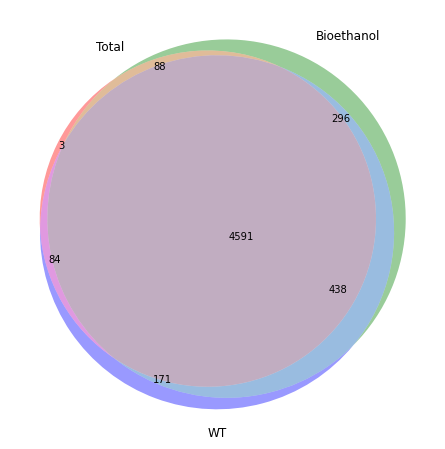

In [8]:
# plot ven diagram with coreList,bioethanol_coreList,wt_coreList
from matplotlib_venn import venn3
plt.figure(figsize=(8,8))
venn3([set(coreList),set(bioethanol_coreList),set(wt_coreList)],set_labels=('Total','Bioethanol','WT'))
plt.show()

In [9]:
# compare the COG distribution differnece between bioethanol unique core & wt unique core
df_frequence=pd.DataFrame(df_functional_annot['COG_category'].value_counts()/(df_functional_annot['COG_category'].value_counts().sum()))
df_frequence['WT']=pd.DataFrame(df_functional_annot.loc[df_functional_annot.index.isin(wt_unique_core),:]['COG_category'].value_counts()/(df_functional_annot.loc[df_functional_annot.index.isin(wt_unique_core),:]['COG_category'].value_counts().sum()))
df_frequence['Bioethanol']=pd.DataFrame(df_functional_annot.loc[df_functional_annot.index.isin(bioethanol_unique_core),:]['COG_category'].value_counts()/(df_functional_annot.loc[df_functional_annot.index.isin(bioethanol_unique_core),:]['COG_category'].value_counts().sum()))
# fill nan as 0
df_frequence=df_frequence.fillna(0)

# calculate the p value between df_frequence['WT'] & df_frequence['Bioethanol']
from scipy.stats import ttest_ind
p_value=ttest_ind(df_frequence['WT'],df_frequence['Bioethanol'])
print('p value between WT vs Bioethanol ',p_value)

p value between WT vs Bioethanol  Ttest_indResult(statistic=-4.191017030350197e-16, pvalue=0.9999999999999997)


### Clustering bioethanol vs wildtype by geneMatrix/cnvMatrix

In [10]:
# combine bioethanol & wt gene/cnvMatrix
geneMatrix=pd.concat([bioethanol_geneMatrix,wt_geneMatrix],axis=1).T
cnvMatrix=pd.concat([bioethanol_cnvMatrix,wt_cnvMatrix],axis=1).T
# remove columns which sum is 0
geneMatrix=geneMatrix.loc[:,geneMatrix.sum(axis=0)>0]
cnvMatrix=cnvMatrix.loc[:,cnvMatrix.sum(axis=0)>0]

# add label
geneMatrix.loc[bioethanol_strainList,'Type']='Bioethanol'
geneMatrix.loc[wt_strainList,'Type']='Wild-type'
cnvMatrix.loc[bioethanol_strainList,'Type']='Bioethanol'
cnvMatrix.loc[wt_strainList,'Type']='Wild-type'

geneMatrix

,YAL001C,YAL002W,YAL003W,YAL004W,YAL008W,YAL009W,YAL011W,YAL012W,YAL013W,YAL014C,...,YMR170C,YIL009W,YOL157C,YNL270C,YOR108W,YOL086C,YBR145W,YMR303C,YCL040W,Type
AFR_5.re,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Bioethanol
BVC_6.re,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Bioethanol
AEG_8.re,1,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Bioethanol
AGM_1.re,1,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Bioethanol
CNQ_1.re,1,1,1,0,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,Bioethanol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCV_1.re,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Wild-type
CDA_2.re,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Wild-type
AGR_2.re,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,Wild-type
ARG_5.re,1,1,1,0,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,Wild-type


In [11]:
# PCA analysis for cnvMatrix and geneMatrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
x1 = StandardScaler().fit_transform(geneMatrix.drop('Type',axis=1))
x2 = StandardScaler().fit_transform(cnvMatrix.drop('Type',axis=1))

# PCA
pca1 = PCA(n_components=2)
pca2 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)
principalComponents2 = pca2.fit_transform(x2)


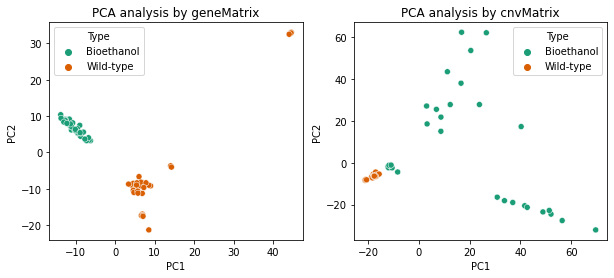

In [48]:
# plot
fig,axes=plt.subplots(1,2,figsize=(10,4))

# plot geneMatrix
pca_geneMatrix=pd.DataFrame(principalComponents1,columns=['PC1','PC2'])
pca_geneMatrix['Type']=geneMatrix['Type'].values
sns.scatterplot(data=pca_geneMatrix,x='PC1',y='PC2',hue='Type',ax=axes[0],palette='Dark2')
axes[0].set_title('PCA analysis by geneMatrix')

# plot cnvMatrix
pca_cnvMatrix=pd.DataFrame(principalComponents2,columns=['PC1','PC2'])
pca_cnvMatrix['Type']=cnvMatrix['Type'].values
sns.scatterplot(data=pca_cnvMatrix,x='PC1',y='PC2',hue='Type',ax=axes[1],palette='Dark2')
axes[1].set_title('PCA analysis by cnvMatrix')

plt.show()

# save pca result
pca_geneMatrix.to_csv('code/7.anaerobic_growth_analysis/output/bioethanol_vs_wt_pca_geneMatrix.csv')
pca_cnvMatrix.to_csv('code/7.anaerobic_growth_analysis/output/bioethanol_vs_wt_pca_cnvMatrix.csv')

In [24]:
# extract the top important genes from PC1 variable
# geneMatrix
df_geneMatrix_pcafeature=pd.DataFrame(pca1.components_,columns=geneMatrix.drop('Type',axis=1).columns,index=['PC1','PC2'])
df_geneMatrix_pcafeature=df_geneMatrix_pcafeature.T
df_geneMatrix_pcafeature['PC1_abs']=df_geneMatrix_pcafeature['PC1'].abs()
df_geneMatrix_pcafeature=df_geneMatrix_pcafeature.sort_values(by='PC1_abs',ascending=False)

# cnvMatrix
df_cnvMatrix_pcafeature=pd.DataFrame(pca2.components_,columns=cnvMatrix.drop('Type',axis=1).columns,index=['PC1','PC2'])
df_cnvMatrix_pcafeature=df_cnvMatrix_pcafeature.T
df_cnvMatrix_pcafeature['PC1_abs']=df_cnvMatrix_pcafeature['PC1'].abs()
df_cnvMatrix_pcafeature=df_cnvMatrix_pcafeature.sort_values(by='PC1_abs',ascending=False)

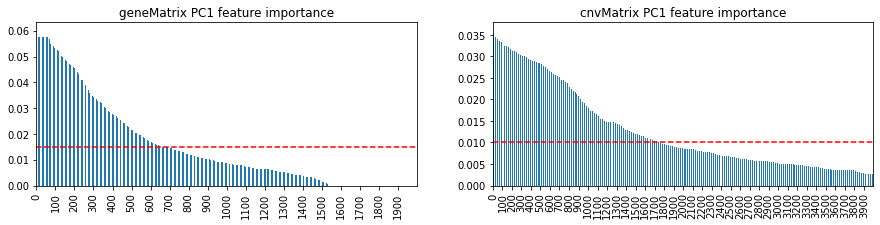

In [32]:
fig,axes=plt.subplots(1,2,figsize=(15,3))
# plot geneMatrix
df_geneMatrix_pcafeature['PC1_abs'].head(2000).plot(kind='bar',ax=axes[0],xticks=range(0,2000,100),rot=90)
# set xticklabels as range(1,2000,100)
axes[0].set_title('geneMatrix PC1 feature importance')
# plot another dashed line 
axes[0].axhline(y=0.015,linestyle='--',color='r')

# plot cnvMatrix
df_cnvMatrix_pcafeature['PC1_abs'].head(4000).plot(kind='bar',ax=axes[1],xticks=range(0,4000,100),rot=90)
# set xticklabels as range(1,2000,100)
axes[1].set_title('cnvMatrix PC1 feature importance')
# plot another dashed line
axes[1].axhline(y=0.01,linestyle='--',color='r')

plt.show()

In [49]:
geneMatrix_important_geneList=df_geneMatrix_pcafeature.head(100).index.tolist()
cnvMatrix_important_geneList=df_cnvMatrix_pcafeature.head(100).index.tolist()

common_important_geneList=list(set(geneMatrix_important_geneList)&set(cnvMatrix_important_geneList))

In [50]:
#save result
bioethanol_vs_wt_pca_feature={}
bioethanol_vs_wt_pca_feature['geneMatrix']=geneMatrix_important_geneList
bioethanol_vs_wt_pca_feature['cnvMatrix']=cnvMatrix_important_geneList

# save result
import json
with open('code/7.anaerobic_growth_analysis/output/bioethanol_vs_wt_pca_features.json','w') as f:
    json.dump(bioethanol_vs_wt_pca_feature,f)